In [342]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
#from cat_hotcode import one_hot_encoding_and_bind
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [343]:
# local imports
from utilities.utlity import *

## import the dataset

In [344]:
# import the dataset

dataset = pd.read_csv('data/bank/bank.csv', sep=';')
dataset.name = 'dataset'

In [345]:
dataset.head(10)

age            job  marital  education default  balance housing loan  \
0   30     unemployed  married    primary      no     1787      no   no   
1   33       services  married  secondary      no     4789     yes  yes   
2   35     management   single   tertiary      no     1350     yes   no   
3   30     management  married   tertiary      no     1476     yes  yes   
4   59    blue-collar  married  secondary      no        0     yes   no   
5   35     management   single   tertiary      no      747      no   no   
6   36  self-employed  married   tertiary      no      307     yes   no   
7   39     technician  married  secondary      no      147     yes   no   
8   41   entrepreneur  married   tertiary      no      221     yes   no   
9   43       services  married    primary      no      -88     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
5  cellular   23   feb       141         2    176         3  failure  no  
6  cellular   14   may       341         1    330         2    other  no  
7  cellular    6   may       151         2     -1         0  unknown  no  
8   unknown   14   may        57         2     -1         0  unknown  no  
9  cellular   17   apr       313         1    147         2  failure  no

# Exploring the dataset

#### Check the shape and size of the imported dataset

In [346]:
shape(dataset)
size(dataset)

dataset shape: (4521, 17)
dataset size: 76857


Our dataset has 4119 rows and 21 columns

#### Check the schema of the dataset

In [347]:
check_info(dataset)

dataset dataset schema:
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


#### Check the statiscical data of the dataset

In [348]:
dataset.describe().T

count         mean          std     min    25%    50%     75%  \
age       4521.0    41.170095    10.576211    19.0   33.0   39.0    49.0   
balance   4521.0  1422.657819  3009.638142 -3313.0   69.0  444.0  1480.0   
day       4521.0    15.915284     8.247667     1.0    9.0   16.0    21.0   
duration  4521.0   263.961292   259.856633     4.0  104.0  185.0   329.0   
campaign  4521.0     2.793630     3.109807     1.0    1.0    2.0     3.0   
pdays     4521.0    39.766645   100.121124    -1.0   -1.0   -1.0    -1.0   
previous  4521.0     0.542579     1.693562     0.0    0.0    0.0     0.0   

              max  
age          87.0  
balance   71188.0  
day          31.0  
duration   3025.0  
campaign     50.0  
pdays       871.0  
previous     25.0

#### Unique values of each column. 

In [349]:
get_unique_values(dataset)

Unique values in column  job are ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
----------------------------------------------
Unique values in column  marital are ['married' 'single' 'divorced']
----------------------------------------------
Unique values in column  education are ['primary' 'secondary' 'tertiary' 'unknown']
----------------------------------------------
Unique values in column  default are ['no' 'yes']
----------------------------------------------
Unique values in column  housing are ['no' 'yes']
----------------------------------------------
Unique values in column  loan are ['no' 'yes']
----------------------------------------------
Unique values in column  contact are ['cellular' 'unknown' 'telephone']
----------------------------------------------
Unique values in column  month are ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
-------

#### Check each column and the number of rows with no value

In [350]:
check_missing_val(dataset)

Sum of missing values in dataset
------------------------------
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


The result shows that the dataset doesn't have missing values

### Explore the columns that doesn't have numberical data type

In [351]:
# Categorical variables
cat_data = dataset.select_dtypes(exclude='number')
cat_data.head()

job  marital  education default housing loan   contact month  \
0   unemployed  married    primary      no      no   no  cellular   oct   
1     services  married  secondary      no     yes  yes  cellular   may   
2   management   single   tertiary      no     yes   no  cellular   apr   
3   management  married   tertiary      no     yes  yes   unknown   jun   
4  blue-collar  married  secondary      no     yes   no   unknown   may   

  poutcome   y  
0  unknown  no  
1  failure  no  
2  failure  no  
3  unknown  no  
4  unknown  no

### Explore the columns that have numberical data type

In [352]:
# Categorical variables
categorical_data = dataset.select_dtypes(exclude='number')
categorical_data.name = "categorical_data";
categorical_data.head()
shape(categorical_data.columns)

None shape: (10,)


#### 11 out of 20 columns have non numerical data type

In [353]:
# numerical variables
numberical_data = dataset.select_dtypes(include='number')
numberical_data.name = "numberical_data";
numberical_data.head()
shape(numberical_data.columns)

None shape: (7,)


#### 10 out of 20 columns have non numerical data type

## Correlation

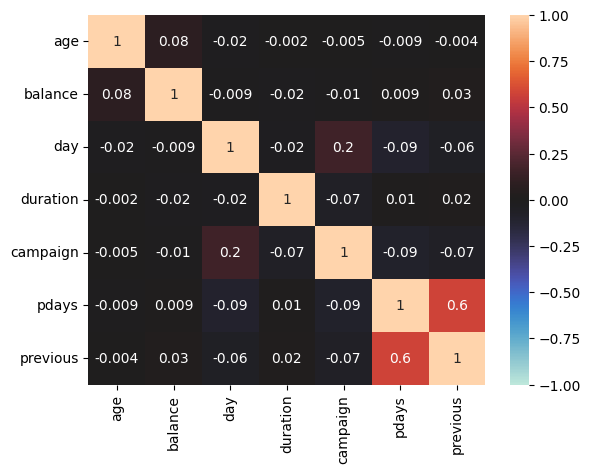

In [354]:
# visualize correlation between the columns that have numberical data dype
sns.heatmap(dataset.corr(), annot=True, fmt='.1g', 
                 vmin=-1, vmax=1, center= 0);

### Replacing outlier datapoints with nan

In [355]:
# Copying the dataset to a new df to handle outliers
dataset_new = dataset.copy(deep=True)
dataset_new.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [356]:
replace_outliers_with_nan(numberical_data, dataset_new)

column 1: age
------------------------
1st quantile =>  33.0
3rd quantile =>  49.0
IQR => 16.0
fence_low => 9.0
fence_high => 73.0

------------------------
column 2: balance
------------------------
1st quantile =>  69.0
3rd quantile =>  1480.0
IQR => 1411.0
fence_low => -2047.5
fence_high => 3596.5

------------------------
column 3: day
------------------------
1st quantile =>  9.0
3rd quantile =>  21.0
IQR => 12.0
fence_low => -9.0
fence_high => 39.0

------------------------
column 4: duration
------------------------
1st quantile =>  104.0
3rd quantile =>  329.0
IQR => 225.0
fence_low => -233.5
fence_high => 666.5

------------------------
column 5: campaign
------------------------
1st quantile =>  1.0
3rd quantile =>  3.0
IQR => 2.0
fence_low => -2.0
fence_high => 6.0

------------------------
column 6: pdays
------------------------
1st quantile =>  -1.0
3rd quantile =>  -1.0
IQR => 0.0
fence_low => -1.0
fence_high => -1.0

------------------------
column 7: previous
---------

In [357]:
get_column_with_nan_values(dataset_new)

age          38
balance     506
day           0
duration    330
campaign    318
pdays       816
previous    816
dtype: int64


In [358]:
export_to_csv(dataset_new, 'bank-addition-full-without-outliers.csv')

## Data preprocessing

In [359]:
## L1- regularization- Reduce Features by droping features which do not has impact on the training contact communication type and last contact date

In [360]:
dataset_new = dataset_new.drop(columns=['contact', 'month'])

In [361]:
dataset_new.head()


age          job  marital  education default  balance housing loan  day  \
0  30.0   unemployed  married    primary      no   1787.0      no   no   19   
1  33.0     services  married  secondary      no      NaN     yes  yes   11   
2  35.0   management   single   tertiary      no   1350.0     yes   no   16   
3  30.0   management  married   tertiary      no   1476.0     yes  yes    3   
4  59.0  blue-collar  married  secondary      no      0.0     yes   no    5   

   duration  campaign  pdays  previous poutcome   y  
0      79.0       1.0   -1.0       0.0  unknown  no  
1     220.0       1.0    NaN       NaN  failure  no  
2     185.0       1.0    NaN       NaN  failure  no  
3     199.0       4.0   -1.0       0.0  unknown  no  
4     226.0       1.0   -1.0       0.0  unknown  no

In [362]:
## Number of Education category
dataset_new.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [363]:
## Number of Job category
dataset_new.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [364]:
## Number of Marital Statu category
dataset_new.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [365]:
## Number of Marital Statu category
dataset_new.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [366]:
## One hot encoding for education 
education_hot=pd.get_dummies(dataset_new.education)

In [367]:
## One hot encoding for job 
job_hot=pd.get_dummies(dataset_new.job)

In [368]:
## One hot encoding for marital 
marital_hot = pd.get_dummies(dataset_new.marital)


In [369]:
## One hot encoding for poutcome 
poutcome_hot = pd.get_dummies(dataset_new.poutcome)


In [370]:
new_bank_ds = dataset_new[['age','default','balance','housing','loan','day','duration','campaign','pdays','previous','poutcome','y']]
                          

In [371]:
new_bank_ds.head()


age default  balance housing loan  day  duration  campaign  pdays  \
0  30.0      no   1787.0      no   no   19      79.0       1.0   -1.0   
1  33.0      no      NaN     yes  yes   11     220.0       1.0    NaN   
2  35.0      no   1350.0     yes   no   16     185.0       1.0    NaN   
3  30.0      no   1476.0     yes  yes    3     199.0       4.0   -1.0   
4  59.0      no      0.0     yes   no    5     226.0       1.0   -1.0   

   previous poutcome   y  
0       0.0  unknown  no  
1       NaN  failure  no  
2       NaN  failure  no  
3       0.0  unknown  no  
4       0.0  unknown  no

In [372]:

   
    new_bank_ds = pd.concat([new_bank_ds, job_hot,marital_hot,education_hot,poutcome_hot], axis=1)



In [373]:
new_bank_ds.head()


age default  balance housing loan  day  duration  campaign  pdays  \
0  30.0      no   1787.0      no   no   19      79.0       1.0   -1.0   
1  33.0      no      NaN     yes  yes   11     220.0       1.0    NaN   
2  35.0      no   1350.0     yes   no   16     185.0       1.0    NaN   
3  30.0      no   1476.0     yes  yes    3     199.0       4.0   -1.0   
4  59.0      no      0.0     yes   no    5     226.0       1.0   -1.0   

   previous  ... married single  primary  secondary  tertiary  unknown  \
0       0.0  ...       1      0        1          0         0        0   
1       NaN  ...       1      0        0          1         0        0   
2       NaN  ...       0      1        0          0         1        0   
3       0.0  ...       1      0        0          0         1        0   
4       0.0  ...       1      0        0          1         0        0   

   failure  other  success  unknown  
0        0      0        0        1  
1        1      0        0        0  
2        1      0        0        0  
3        0      0        0        1  
4        0      0        0        1  

[5 rows x 35 columns]

In [374]:
# Convert Yes/no to 1 and 0 for default, housing and loan
new_bank_ds['default'] = new_bank_ds['default'].map({'yes': 1, 'no': 0})


In [375]:
new_bank_ds['loan'] = new_bank_ds['loan'].map({'yes': 1, 'no': 0})

In [376]:
new_bank_ds['housing'] = new_bank_ds['housing'].map({'yes': 1, 'no': 0})

In [377]:
new_bank_ds.head()

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0  30.0        0   1787.0        0     0   19      79.0       1.0   -1.0   
1  33.0        0      NaN        1     1   11     220.0       1.0    NaN   
2  35.0        0   1350.0        1     0   16     185.0       1.0    NaN   
3  30.0        0   1476.0        1     1    3     199.0       4.0   -1.0   
4  59.0        0      0.0        1     0    5     226.0       1.0   -1.0   

   previous  ... married single  primary  secondary  tertiary  unknown  \
0       0.0  ...       1      0        1          0         0        0   
1       NaN  ...       1      0        0          1         0        0   
2       NaN  ...       0      1        0          0         1        0   
3       0.0  ...       1      0        0          0         1        0   
4       0.0  ...       1      0        0          1         0        0   

   failure  other  success  unknown  
0        0      0        0        1  
1        1      0        0        0  
2        1      0        0        0  
3        0      0        0        1  
4        0      0        0        1  

[5 rows x 35 columns]

In [378]:
#new_bank_ds.plot(kind = 'bar')

In [382]:
# Normalization for age, balance and duration
new_bank_ds['age'] = new_bank_ds['age'] /new_bank_ds['age'].abs().max()

In [383]:
new_bank_ds['balance'] = new_bank_ds['balance'] /new_bank_ds['balance'].abs().max()

In [384]:
new_bank_ds['duration'] = new_bank_ds['balance'] /new_bank_ds['balance'].abs().max()

In [385]:
new_bank_ds.head()

age  default   balance  housing  loan  day  duration  campaign  pdays  \
0  0.410959        0  0.498188        0     0   19  0.498188       1.0   -1.0   
1  0.452055        0       NaN        1     1   11       NaN       1.0    NaN   
2  0.479452        0  0.376359        1     0   16  0.376359       1.0    NaN   
3  0.410959        0  0.411486        1     1    3  0.411486       4.0   -1.0   
4  0.808219        0  0.000000        1     0    5  0.000000       1.0   -1.0   

   previous  ... married single  primary  secondary  tertiary  unknown  \
0       0.0  ...       1      0        1          0         0        0   
1       NaN  ...       1      0        0          1         0        0   
2       NaN  ...       0      1        0          0         1        0   
3       0.0  ...       1      0        0          0         1        0   
4       0.0  ...       1      0        0          1         0        0   

   failure  other  success  unknown  
0        0      0        0        1  
1        1      0        0        0  
2        1      0        0        0  
3        0      0        0        1  
4        0      0        0        1  

[5 rows x 35 columns]